In [1]:
import os
import cv2
import numpy as np
import time
from fitter import Fitter

from skimage import color

def getavgstd(image):
    avg = []
    std = []
    image_avg_h = np.mean(image[:, :, 0])
    image_std_h = np.std(image[:, :, 0])
    image_avg_e = np.mean(image[:, :, 1])
    image_std_e = np.std(image[:, :, 1])
    image_avg_d = np.mean(image[:, :, 2])
    image_std_d = np.std(image[:, :, 2])
    avg.append(image_avg_h)
    avg.append(image_avg_e)
    avg.append(image_avg_d)
    std.append(image_std_h)
    std.append(image_std_e)
    std.append(image_std_d)
    return (avg, std)


path_dataset = '/root/autodl-nas/nine_class/standard/train'

# path_

hedH_avg_List = []
hedE_avg_List = []
hedD_avg_List = []
hedH_std_List = []
hedE_std_List = []
hedD_std_List = []

t1 = time.time()
for class_dir in os.listdir(path_dataset):
    path_class = os.path.join(path_dataset,class_dir)
    print(path_class)
    for image in os.listdir(path_class):
        path_img = os.path.join(path_class,image)
        img = cv2.imread(path_img)
        # print(img) #None
        try:
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            img = color.rgb2hed(img)
            img_avg, img_std = getavgstd(img)
        except:
            continue
            print(path_img)
        hedH_avg_List.append(img_avg[0])
        hedE_avg_List.append(img_avg[1])
        hedD_avg_List.append(img_avg[2])
        hedH_std_List.append(img_std[0])
        hedE_std_List.append(img_std[1])
        hedD_std_List.append(img_std[2])

t2 = time.time()
print(t2-t1)
#     break

/root/autodl-nas/nine_class/standard/train/NORM
/root/autodl-nas/nine_class/standard/train/MUS
/root/autodl-nas/nine_class/standard/train/STR
/root/autodl-nas/nine_class/standard/train/TUM
/root/autodl-nas/nine_class/standard/train/DEB
/root/autodl-nas/nine_class/standard/train/LYM
/root/autodl-nas/nine_class/standard/train/MUC
/root/autodl-nas/nine_class/standard/train/ADI
311.0227084159851


{'laplace': {'loc': 0.02970971323531819, 'scale': 0.024586825891719087}}

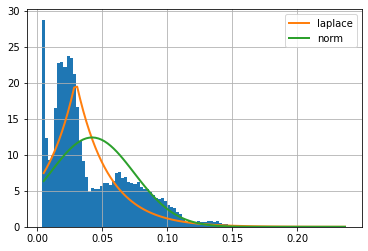

In [2]:
f = Fitter(hedH_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 0.014455546451392538, 'scale': 0.009408419849931949}}

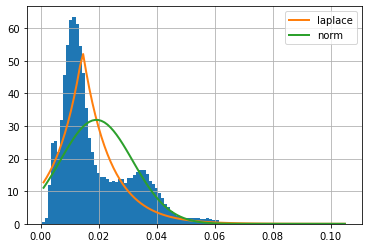

In [3]:
f = Fitter(hedH_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 0.01852561118331757, 'scale': 0.012213550752634373}}

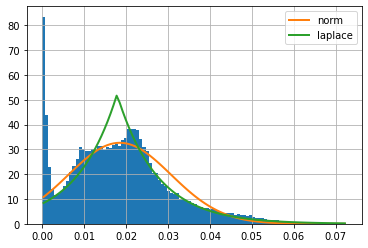

In [4]:
f = Fitter(hedE_avg_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 0.008310761026957568, 'scale': 0.007777007027012751}}

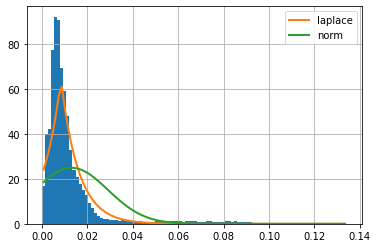

In [5]:
f = Fitter(hedE_std_List, distributions=['norm',  'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 0.0129677427762183, 'scale': 0.014755787953793065}}

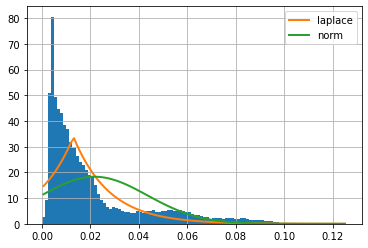

In [6]:
f = Fitter(hedD_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 0.013212550038635756, 'scale': 0.009916581687792093}}

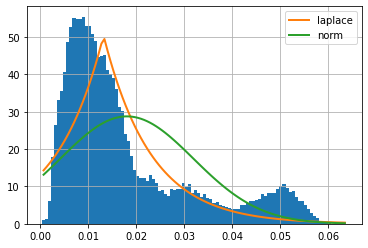

In [7]:
f = Fitter(hedD_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')